<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/LR_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
read_file = pd.read_csv (r'kc_house_price.txt')
read_file.to_csv (r'data.csv', index=None)
df=pd.read_csv (r'data.csv')
df=df[['price','sqft_living','bedrooms']]

In [2]:
df.info

<bound method DataFrame.info of           price  sqft_living  bedrooms
0      221900.0         1180         3
1      538000.0         2570         3
2      180000.0          770         2
3      604000.0         1960         4
4      510000.0         1680         3
...         ...          ...       ...
21592  360000.0         1530         3
21593  400000.0         2310         4
21594  402101.0         1020         2
21595  400000.0         1600         3
21596  325000.0         1020         2

[21597 rows x 3 columns]>

In [3]:
#eliminate outliers
df['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [4]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f96ed534d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96ed53a7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f96ed534750>],
 'medians': [<matplotlib.lines.Line2D at 0x7f96ed5402d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f96ed540810>],
 'means': []}

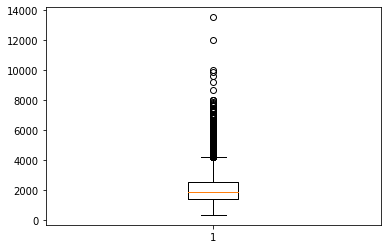

In [6]:
plt.boxplot(df['sqft_living'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f96ed4b2950>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96ed4b8410>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f96ed4b2390>],
 'medians': [<matplotlib.lines.Line2D at 0x7f96ed4b8ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f96ed4c0450>],
 'means': []}

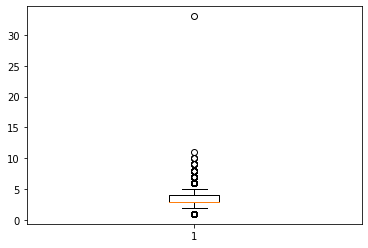

In [7]:
plt.boxplot(df['bedrooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f96ed426b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96ed42c5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f96ed426550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f96ed4350d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f96ed435610>],
 'means': []}

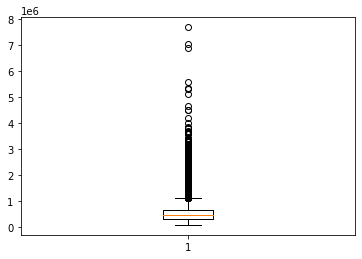

In [8]:
plt.boxplot(df['price'])

In [14]:
def list_of_data_of_outliers(q25,q75,col_name):
  intr_qr = q75-q25
  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)
  l2=np.where(df[col_name]>max)
  l1=np.where(df[col_name]<min)
  return np.union1d(l2,l1)
def union(l1,l2):
  return np.union1d(l1,l2)

In [16]:
a=df['bedrooms'].quantile([0.25,0.5,0.75]).to_list()
b=df['sqft_living'].quantile([0.25,0.5,0.75]).to_list()
c=df['price'].quantile([0.25,0.5,0.75]).to_list()

a1=list_of_data_of_outliers(a[0],a[2],'bedrooms')
b1=list_of_data_of_outliers(b[0],b[2],'sqft_living')
c1=list_of_data_of_outliers(c[0],c[2],'price')

d=union(a1,b1)
total=union(d,c1)


1780

In [17]:
df_new=df.drop(total,axis=0)

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19817 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19817 non-null  float64
 1   sqft_living  19817 non-null  int64  
 2   bedrooms     19817 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 619.3 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7f96eb182bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96eb190f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f96eb1829d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f96eb32a7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f96eb24ea90>],
 'means': []}

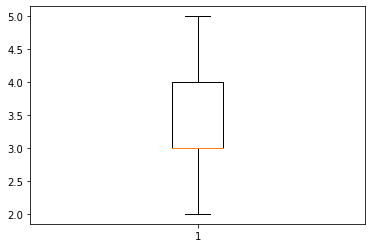

In [19]:
plt.boxplot(df_new['bedrooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f96eb0a5990>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96eb0ab450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f96eb0a53d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f96eb0abf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f96eb0b3490>],
 'means': []}

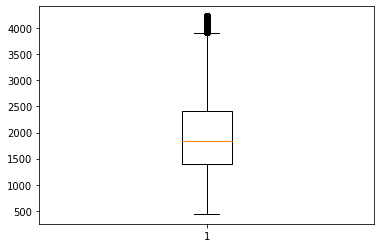

In [20]:
plt.boxplot(df_new['sqft_living'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f96eb01d0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96eb01db50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f96eb019ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f96eb023650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f96eb023b90>],
 'means': []}

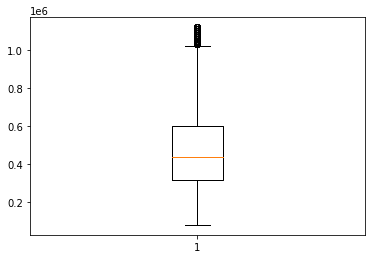

In [21]:
plt.boxplot(df_new['price'])

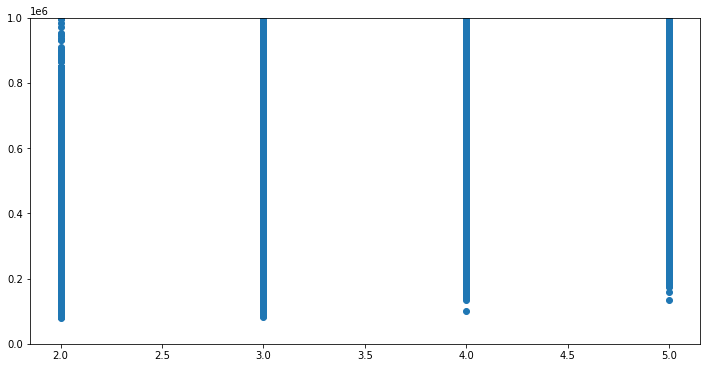

In [28]:
fig = plt.figure(figsize=(12,6))
plt.ylim([0,1000000])
plt.scatter(x=df_new['bedrooms'],y=df_new['price'])

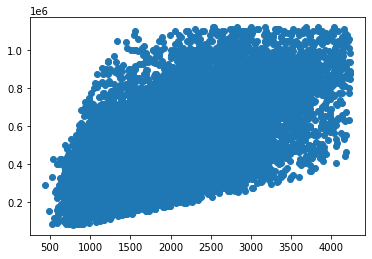

In [29]:
plt.scatter(x=df_new['sqft_living'],y=df_new['price'])

In [31]:
corr_matrix = df_new.corr()
print(corr_matrix)

                price  sqft_living  bedrooms
price        1.000000     0.609836  0.283086
sqft_living  0.609836     1.000000  0.592659
bedrooms     0.283086     0.592659  1.000000


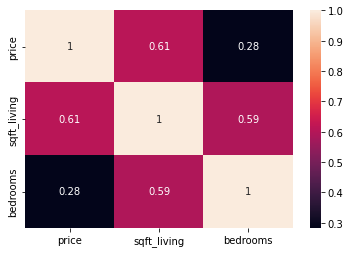

In [32]:
import seaborn as sn
sn.heatmap(corr_matrix, annot=True)
plt.show()

(array([  88.,  388., 1200., 2114., 2187., 2190., 2043., 1710., 1587.,
        1343., 1172.,  856.,  744.,  610.,  491.,  368.,  278.,  218.,
         114.,  116.]),
 array([  78000.,  130100.,  182200.,  234300.,  286400.,  338500.,
         390600.,  442700.,  494800.,  546900.,  599000.,  651100.,
         703200.,  755300.,  807400.,  859500.,  911600.,  963700.,
        1015800., 1067900., 1120000.]),
 <a list of 20 Patch objects>)

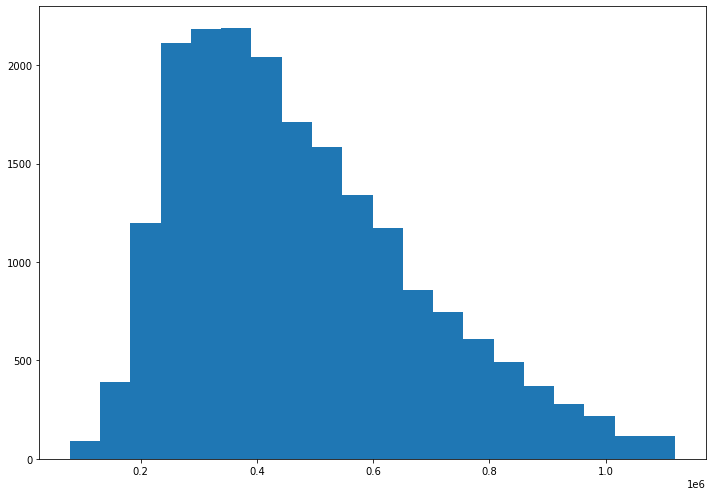

In [33]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(df_new['price'], bins = 20)

(array([  27.,  378.,  945., 1472., 1955., 2135., 2093., 1960., 1822.,
        1552., 1347., 1054.,  811.,  679.,  530.,  373.,  268.,  193.,
         132.,   91.]),
 array([ 440. ,  629.5,  819. , 1008.5, 1198. , 1387.5, 1577. , 1766.5,
        1956. , 2145.5, 2335. , 2524.5, 2714. , 2903.5, 3093. , 3282.5,
        3472. , 3661.5, 3851. , 4040.5, 4230. ]),
 <a list of 20 Patch objects>)

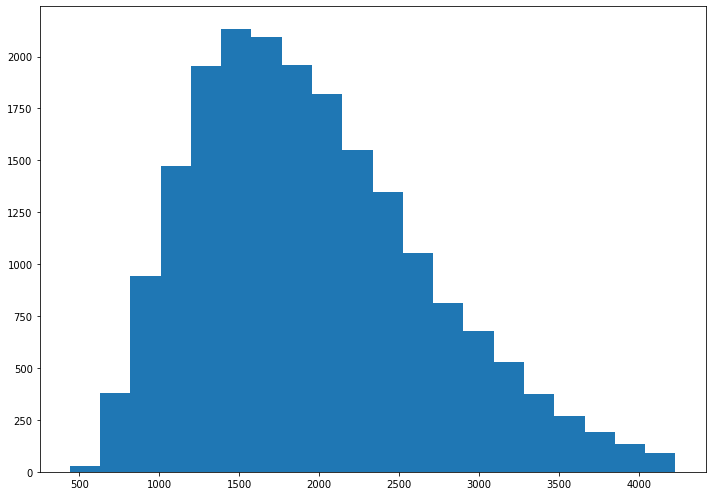

In [35]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.hist(df_new['sqft_living'], bins = 20)

(array([2736.,    0.,    0.,    0.,    0.,    0., 9584.,    0.,    0.,
           0.,    0.,    0.,    0., 6222.,    0.,    0.,    0.,    0.,
           0., 1275.]),
 array([2.  , 2.15, 2.3 , 2.45, 2.6 , 2.75, 2.9 , 3.05, 3.2 , 3.35, 3.5 ,
        3.65, 3.8 , 3.95, 4.1 , 4.25, 4.4 , 4.55, 4.7 , 4.85, 5.  ]),
 <a list of 20 Patch objects>)

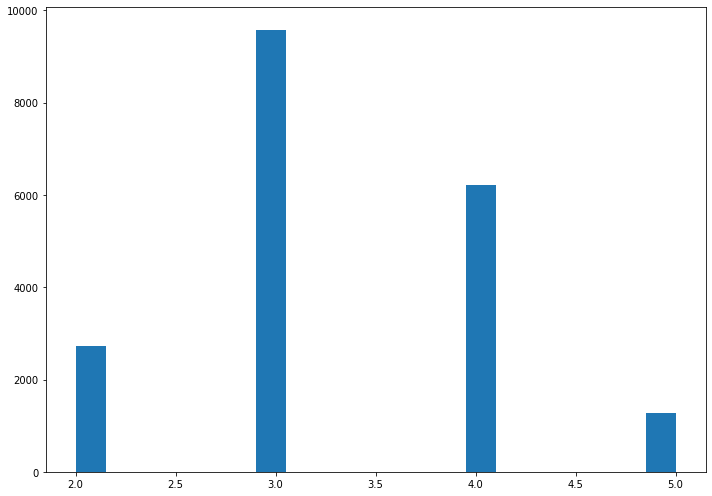

In [37]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.hist(df_new['bedrooms'], bins = 20)

In [73]:
df_for_train=df_new.to_numpy()
print(df_for_train)

[[2.21900e+05 1.18000e+03 3.00000e+00]
 [5.38000e+05 2.57000e+03 3.00000e+00]
 [1.80000e+05 7.70000e+02 2.00000e+00]
 ...
 [4.02101e+05 1.02000e+03 2.00000e+00]
 [4.00000e+05 1.60000e+03 3.00000e+00]
 [3.25000e+05 1.02000e+03 2.00000e+00]]


In [74]:
df_for_train.shape

(19817, 3)

In [75]:
from sklearn.preprocessing import StandardScaler
def standardized(dataset):
    scaler = StandardScaler()
    scaler.fit(dataset)
    dataset = scaler.transform(dataset)
    return dataset
    

In [71]:
t=standardized(df_for_train)
X=t[:,[1,2]]
y=t[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [76]:
x=standardized(df_for_train[:,[1,2]])


In [77]:
X=x
y=df_for_train[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Coefficients:  [140156.01926947 -26237.36554168]
Variance score: 0.3797611488519905


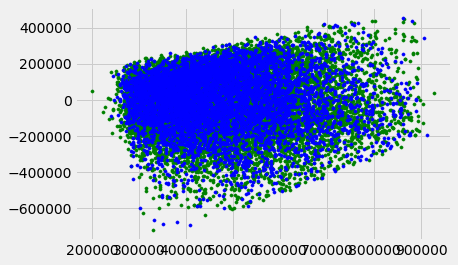

In [78]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')